In [ ]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://www-us.apache.org/dist/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.0-preview2-bin-hadoop3.2.tgz
!pip install -q findspark

spark-3.0.0-preview2-bin-hadoop3.2/
spark-3.0.0-preview2-bin-hadoop3.2/data/
spark-3.0.0-preview2-bin-hadoop3.2/data/streaming/
spark-3.0.0-preview2-bin-hadoop3.2/data/streaming/AFINN-111.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_binary_classification_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_kmeans_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_multiclass_classification_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_lda_libsvm_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/iris_libsvm.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/pagerank_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_linear_regression_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/pic_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/als/
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/als/test.data
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/als/sample_movielens_rati

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession \
        .builder\
        .appName("Did age affect to increasing death in COVID19")\
        .getOrCreate()

In [ ]:
path = "data/COVID19.csv"
age_death = spark.read.csv(path)

In [ ]:
age_death.take(5)

[Row(_c0='ID', _c1='age', _c2='sex', _c3='city', _c4='province', _c5='country', _c6='latitude', _c7='longitude', _c8='geo_resolution', _c9='date_onset_symptoms', _c10='date_admission_hospital', _c11='date_confirmation', _c12='symptoms', _c13='lives_in_Wuhan', _c14='travel_history_dates', _c15='travel_history_location', _c16='reported_market_exposure', _c17='additional_information', _c18='chronic_disease_binary', _c19='chronic_disease', _c20='source', _c21='sequence_available', _c22='outcome', _c23='date_death_or_discharge', _c24='notes_for_discussion', _c25='location', _c26='admin3', _c27='admin2', _c28='admin1', _c29='country_new', _c30='admin_id', _c31='data_moderator_initials', _c32='travel_history_binary'),
 Row(_c0='000-1-1', _c1=None, _c2='male', _c3='Shek Lei', _c4='Hong Kong', _c5='China', _c6='22.3650193', _c7='114.133808', _c8='point', _c9=None, _c10=None, _c11='14.02.2020', _c12=None, _c13=None, _c14='22.01.2020', _c15='China', _c16=None, _c17='Case 55; mainland China travel

In [ ]:
age_death.show(5)

+--------------------+----+---------+----------+---------+---------+----------+----------+--------------+-------------------+--------------------+-----------------+--------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+------------------+--------------------+--------------------+--------------------+-----------+------+------+---------+-----------+--------+--------------------+--------------------+
|                 _c0| _c1|      _c2|       _c3|      _c4|      _c5|       _c6|       _c7|           _c8|                _c9|                _c10|             _c11|    _c12|          _c13|                _c14|                _c15|                _c16|                _c17|                _c18|           _c19|                _c20|              _c21|                _c22|                _c23|                _c24|       _c25|  _c26|  _c27|     _c28|       _c29|    _c30|                _c3

In [ ]:
spark.sql('''
          SELECT age,date_death_or_discharge as death
          FROM age_death
          '''
          ).collect()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
country_log.createOrReplaceTempView("age_death_table")

NameError: ignored

In [ ]:
age_death.createOrReplaceTempView("age_death_table")

In [ ]:
spark.sql('''
          SELECT *
          FROM age_death_table
          LIMIT 6
          '''
          ).show()

+--------------------+----+---------+--------------+---------+---------+----------+------------------+--------------+-------------------+--------------------+-----------------+--------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+------------------+--------------------+--------------------+--------------------+-----------+------+--------------+---------+-----------+--------+--------------------+--------------------+
|                 _c0| _c1|      _c2|           _c3|      _c4|      _c5|       _c6|               _c7|           _c8|                _c9|                _c10|             _c11|    _c12|          _c13|                _c14|                _c15|                _c16|                _c17|                _c18|           _c19|                _c20|              _c21|                _c22|                _c23|                _c24|       _c25|  _c26|          _c27|     _c28|

In [ ]:
spark.sql('''
          SELECT age,date_death_or_discharge as death
          FROM age_death_table
          LIMIT 10
          '''
          ).show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          LIMIT 10
          '''
          ).show()

+----+--------------------+
| _c1|                _c23|
+----+--------------------+
| age|date_death_or_dis...|
|null|                null|
|  78|          22.02.2020|
|  61|                null|
|null|                null|
|null|                null|
|null|                null|
|null|                null|
|null|                null|
|null|                null|
+----+--------------------+



In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          WHERE _c1 desc
          '''
          ).show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



ParseException: ignored

In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          ORDER BY _c1 DESC
          '''
          ).show()

+---+--------------------+
|_c1|                _c23|
+---+--------------------+
|age|date_death_or_dis...|
| 99|          03.05.2020|
| 99|                null|
| 98|                null|
| 97|                null|
| 96|                null|
| 96|                null|
| 96|                null|
| 96|                null|
| 95|                null|
| 95|          03.03.2020|
| 95|          03.03.2020|
| 95|                null|
| 95|                null|
| 94|                null|
| 94|          14.02.2020|
| 94|                null|
| 94|                null|
| 94|                null|
| 93|                null|
+---+--------------------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          ORDER BY ASC
          '''
          ).show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          ORDER BY _c1 ASC
          '''
          ).show

<bound method DataFrame.show of DataFrame[_c1: string, _c23: string]>

In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          ORDER BY _c1 ASC
          '''
          ).show()

+----+----+
| _c1|_c23|
+----+----+
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
+----+----+
only showing top 20 rows



In [ ]:
DELETE FROM table WHERE edit_user IS NULL
spark.sql('''
          DELETE FROM age_death WHERE edit_user IS NULL
          '''
          ).show()

SyntaxError: ignored

In [ ]:
spark.sql('''
          DELETE FROM age_death WHERE edit_user IS NULL
          '''
          ).show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          ORDER BY _c1 ASC
          LIMIT 50
          '''
          ).show()

+----+----+
| _c1|_c23|
+----+----+
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
|null|null|
+----+----+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          WHERE _c1 > 50
          '''
          ).show()

+---+----------+
|_c1|      _c23|
+---+----------+
| 78|22.02.2020|
| 61|      null|
| 66|      null|
| 51|      null|
| 68|      null|
| 53|      null|
| 58|      null|
| 88|      null|
| 78|      null|
| 52|      null|
| 60|      null|
| 56|02.03.2020|
| 79|29.02.2020|
| 60|      null|
| 82|      null|
| 69|      null|
| 55|      null|
| 62|      null|
| 71|29.02.2020|
| 64|      null|
+---+----------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c23
          FROM age_death_table
          WHERE _c1 < 50
          '''
          ).show()

+---+----------+
|_c1|      _c23|
+---+----------+
| 27|      null|
| 17|      null|
| 26|      null|
| 30|      null|
| 35|      null|
| 27|      null|
| 28|      null|
| 33|      null|
| 33|      null|
| 33|      null|
| 45|      null|
| 24|      null|
| 29|      null|
| 21|      null|
| 28|20.02.2020|
| 26|02.03.2020|
| 25|      null|
| 40|      null|
| 43|26.02.2020|
| 33|      null|
+---+----------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c22
          FROM age_death_table
          WHERE _c22 = "death"
          '''
          ).show()

+-----+-----+
|  _c1| _c22|
+-----+-----+
|   78|death|
|   68|death|
|   88|death|
|   95|death|
|80-89|death|
|   60|death|
|   79|death|
|   52|death|
|   66|death|
| null|death|
|   82|death|
|   73|death|
|80-89|death|
|60-69|death|
| null|death|
| null|death|
|   77|death|
|80-89|death|
|60-69|death|
| null|death|
+-----+-----+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c22
          FROM age_death_table
          WHERE _c22 = "Recovered"
          '''
          ).show()

+----+---------+
| _c1|     _c22|
+----+---------+
|  20|Recovered|
|  40|Recovered|
|null|Recovered|
|null|Recovered|
|  78|Recovered|
|  54|Recovered|
|  33|Recovered|
|  46|Recovered|
|  42|Recovered|
|null|Recovered|
|null|Recovered|
|  71|Recovered|
|  28|Recovered|
|  52|Recovered|
|null|Recovered|
|null|Recovered|
|null|Recovered|
|null|Recovered|
|null|Recovered|
|null|Recovered|
+----+---------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c22
          FROM age_death_table
          WHERE _c22 = "Critical condition"
          '''
          ).show()

+----+------------------+
| _c1|              _c22|
+----+------------------+
|null|Critical condition|
+----+------------------+



In [ ]:
spark.sql('''
          SELECT _c1,_c22
          FROM age_death_table
          WHERE _c1 > 70
          '''
          ).show()

+---+---------+
|_c1|     _c22|
+---+---------+
| 78|    death|
| 88|     null|
| 78|     null|
| 79|discharge|
| 82|     null|
| 71|discharge|
| 71|     null|
| 82|     null|
| 73|     null|
| 78|     null|
| 96|     null|
| 75|     null|
| 88|    death|
| 80|     null|
| 77|     null|
| 72|     null|
| 95|    death|
| 81|     null|
| 75|     null|
| 85|     null|
+---+---------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c22
          FROM age_death_table
          WHERE _c1 > 70
          ORDER BY _c1 ASC
          '''
          ).show()

+---+---------+
|_c1|     _c22|
+---+---------+
|101|     null|
|105|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|Recovered|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
| 71|     null|
+---+---------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c22
          FROM age_death_table
          WHERE _c1 IS NOT NULL
          '''
          ).show()

+---+-------+
|_c1|   _c22|
+---+-------+
|age|outcome|
| 78|  death|
| 61|   null|
| 66|   null|
| 27|   null|
| 17|   null|
| 51|   null|
| 68|   null|
| 26|   null|
| 30|   null|
| 53|   null|
| 35|   null|
| 27|   null|
| 28|   null|
| 58|   null|
| 33|   null|
| 33|   null|
| 50|   null|
| 33|   null|
| 45|   null|
+---+-------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1,_c22
          FROM age_death_table
          WHERE _c1 IS NOT NULL AND _c22 IS NOT NULL
          ORDER BY _c1 ASC
          '''
          ).show()

+----+----------------+
| _c1|            _c22|
+----+----------------+
|   0|            died|
|   0|       recovered|
|   0|            died|
|   0|       recovered|
|   0|            died|
|0.25|       discharge|
|0.25|       discharge|
| 0.5|      discharged|
|0.75|stable condition|
|   1|       discharge|
|   1|       Recovered|
|   1|       discharge|
|   1|            died|
|   1|            died|
|   1|      discharged|
|   1|       recovered|
|   1|    Hospitalized|
|   1|            died|
|   1|    Hospitalized|
|  10|          Stable|
+----+----------------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT mean(_c1) as mean_age
          FROM age_death_table
          WHERE _c1 IS NOT NULL
          '''
          ).show()

+------------------+
|          mean_age|
+------------------+
|40.961640489222745|
+------------------+



In [ ]:
spark.sql('''
          SELECT mean(_c1) as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c22 = "death"
          '''
          ).show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL 
          Join(
            '''
            SELECT _c22
            FROM age_death_table
            WHERE _c2 is not null and
            _c2 = "death"
            ''')
          ) 
          
          '''
          ).show()

SyntaxError: ignored

In [ ]:
spark.sql('''
          SELECT c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c1 = 40
          ''')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 = 40 AND _c22 = "death"
          ''')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c1 == 40
          ''')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE  _c1 = 40
          ''')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT _c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c1 = 40
          ''')

DataFrame[mean_age: string, outcome: string]

In [ ]:
spark.sql('''
          SELECT c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c1 = 40
          ''').show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT _c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c1 = 40
          ''').show()

+--------+----------+
|mean_age|   outcome|
+--------+----------+
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|discharged|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
|      40|      null|
+--------+----------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c22 IS NOT NULL and _c1 = 40
          ''').show()

+--------+----------------+
|mean_age|         outcome|
+--------+----------------+
|      40|      discharged|
|      40|       Recovered|
|      40|           Alive|
|      40|           Alive|
|      40|           Alive|
|      40|          Stable|
|      40|stable condition|
|      40|       recovered|
|      40|       recovered|
|      40|       recovered|
|      40|            died|
|      40|       recovered|
|      40|       recovered|
|      40|       recovered|
|      40|       recovered|
|      40|       recovered|
|      40|       Recovered|
|      40|    Hospitalized|
|      40|    Hospitalized|
|      40|       Recovered|
+--------+----------------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1 as age,_c23 as date
          FROM age_death_table
          WHERE _c23 is not null
          ORDER BY _c1 ASC
          
          '''
          ).show()

+----+----------+
| age|      date|
+----+----------+
|null|23.01.2020|
|null|16.02.2020|
|null|18.03.2020|
|null|16.02.2020|
|null|18.02.2020|
|null|22.02.2020|
|null|28.02.2020|
|null|18.02.2020|
|null|13.02.2020|
|null|13.02.2020|
|null|02.02.2020|
|null|19.02.2020|
|null|24.01.2020|
|null|19.02.2020|
|null|07.02.2020|
|null|02.02.2020|
|null|23.02.2020|
|null|24.01.2020|
|null|06.03.2020|
|null|23.01.2020|
+----+----------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1 as age,_c23 as date
          FROM age_death_table
          WHERE _c23 is not null AND _c1 is not null
          ORDER BY _c1 ASC
          
          '''
          ).show()

+----+----------+
| age|      date|
+----+----------+
|   0|16.05.2020|
|   0|12.05.2020|
|   0|09.05.2020|
|0.25|20.02.2020|
|0.25|20.02.2020|
| 0.5|22.02.2020|
|   1|18.02.2020|
|   1|18.02.2020|
|   1|21.05.2020|
|   1|17.02.2020|
|   1|12.05.2020|
|   1|08.05.2020|
|  10|14.05.2020|
|  12|07.03.2020|
|  12|07.03.2020|
|  13|16.03.2020|
|  13|10.03.2020|
|  16|20.02.2020|
|  17|10.05.2020|
|  18|25.05.2020|
+----+----------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1 as age,_c23 as date
          FROM age_death_table
          WHERE _c23 is not null AND _c1 is not null
          ORDER BY _c1 DESC
          
          '''
          ).show()

+-----+--------------------+
|  age|                date|
+-----+--------------------+
|  age|date_death_or_dis...|
|   99|          03.05.2020|
|   95|          03.03.2020|
|   95|          03.03.2020|
|   94|          14.02.2020|
|   92|          03.03.2020|
|   91|          18.04.2020|
|90-99|          03.03.2020|
|90-99|          08.03.2020|
|   90|          27.04.2020|
|    9|          18.02.2020|
|   89|          20.03.2020|
|   89|          28.03.2020|
|   89|          19.01.2020|
|   89|          18.01.2020|
|   89|          22.05.2020|
|   88|          12.03.2020|
|   88|          01.03.2020|
|   87|          23.01.2020|
|   87|          14.03.2020|
+-----+--------------------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1 as age,_c22 as outcome,_c23 as date
          FROM age_death_table
          WHERE _c23 is not null AND _c1 is not null
          ORDER BY _c1 DESC
          
          '''
          ).show()

+-----+----------+--------------------+
|  age|   outcome|                date|
+-----+----------+--------------------+
|  age|   outcome|date_death_or_dis...|
|   99|      died|          03.05.2020|
|   95|     death|          03.03.2020|
|   95|     death|          03.03.2020|
|   94|discharged|          14.02.2020|
|   92|      died|          03.03.2020|
|   91|      died|          18.04.2020|
|90-99|      died|          03.03.2020|
|90-99|      died|          08.03.2020|
|   90|      died|          27.04.2020|
|    9|discharged|          18.02.2020|
|   89|      died|          20.03.2020|
|   89|      died|          28.03.2020|
|   89|      died|          19.01.2020|
|   89|      died|          18.01.2020|
|   89|      died|          22.05.2020|
|   88|      died|          12.03.2020|
|   88|     death|          01.03.2020|
|   87|      died|          23.01.2020|
|   87|      died|          14.03.2020|
+-----+----------+--------------------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT _c1 as age,_c22 as outcome,_c23 as date
          FROM age_death_table
          WHERE _c23 is not null AND _c1 is not null
          ORDER BY _c1 ASC
          
          '''
          ).show()

+----+----------+----------+
| age|   outcome|      date|
+----+----------+----------+
|   0|      died|16.05.2020|
|   0|      died|12.05.2020|
|   0|      died|09.05.2020|
|0.25| discharge|20.02.2020|
|0.25| discharge|20.02.2020|
| 0.5|discharged|22.02.2020|
|   1| discharge|18.02.2020|
|   1| discharge|18.02.2020|
|   1|      died|21.05.2020|
|   1|discharged|17.02.2020|
|   1|      died|12.05.2020|
|   1|      died|08.05.2020|
|  10|      died|14.05.2020|
|  12| discharge|07.03.2020|
|  12| discharge|07.03.2020|
|  13| recovered|16.03.2020|
|  13|      null|10.03.2020|
|  16| discharge|20.02.2020|
|  17|      died|10.05.2020|
|  18|      died|25.05.2020|
+----+----------+----------+
only showing top 20 rows



In [ ]:
spark.sql('''
          SELECT mean(_c1) as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c22 IS NOT NULL
          ''').show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT _c1 as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c22 = "death"
          ''').show()

+--------+-------+
|mean_age|outcome|
+--------+-------+
|      78|  death|
|      68|  death|
|      88|  death|
|      95|  death|
|   80-89|  death|
|      60|  death|
|      79|  death|
|      52|  death|
|      66|  death|
|      82|  death|
|      73|  death|
|   80-89|  death|
|   60-69|  death|
|      77|  death|
|   80-89|  death|
|   60-69|  death|
|      95|  death|
|      79|  death|
|      82|  death|
+--------+-------+



In [ ]:
spark.sql('''
          SELECT mean(_c1) as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c1 = 40
          ''').show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

In [ ]:
spark.sql('''
          SELECT mean(_c1) as mean_age, _c22 as outcome
          FROM age_death_table
          WHERE _c1 IS NOT NULL and _c22 = "death"
          ''').show()

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 10))



AnalysisException: ignored

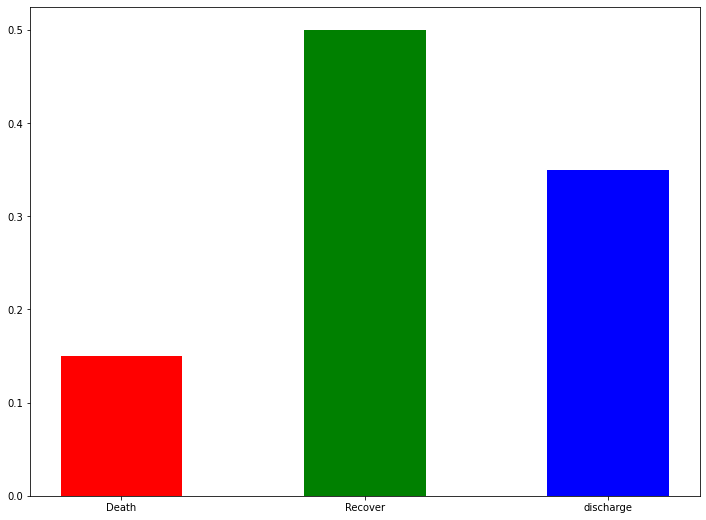

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.bar(x=[1, 2, 3], 
       height=[0.15, 0.5, 0.35],
       color=['red', 'green', 'blue'],
       tick_label=["Death", "Recover", "discharge"],
       width=0.5)

plt.show()